In [116]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

In [117]:
faceImage = cv2.imread(DATA_PATH+"images/musk.jpg",cv2.IMREAD_COLOR)
faceImage = np.float32(faceImage)/255

sunglassPNG = cv2.imread(DATA_PATH+"images/sunglass1.png",cv2.IMREAD_UNCHANGED)
sunglassPNG = np.float32(sunglassPNG)/255

(158, 344, 4)


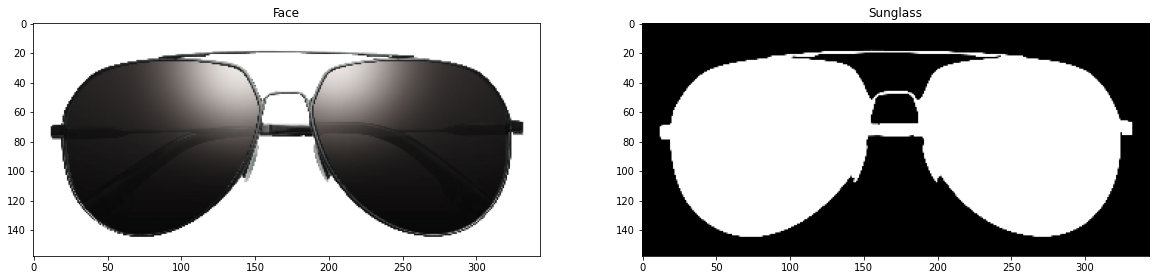

In [118]:
sunglassPNG = cv2.resize(sunglassPNG,None,fx=0.1,fy=0.1)
(sunglassH,sunglassW,channel) = sunglassPNG.shape
print(sunglassPNG.shape)

sunglassBGR = sunglassPNG[:,:,0:3]
sunglassMask1 = sunglassPNG[:,:,3]

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(sunglassBGR[...,::-1]);plt.title("Face");
plt.subplot(122);plt.imshow(sunglassMask1,cmap='gray');plt.title("Sunglass");

(158, 344, 3)


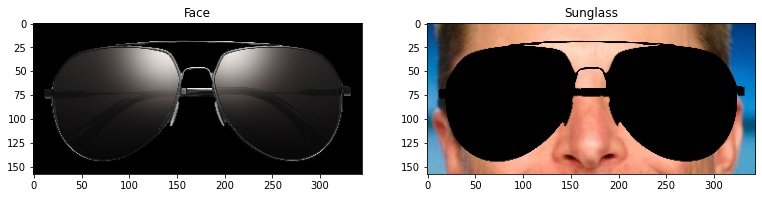

In [119]:
topLeft =110
topRight =120
bottomLeft = topLeft + sunglassH#-20
bottomRight = topRight + sunglassW#-10

sunglassMask = cv2.merge((sunglassMask1,sunglassMask1,sunglassMask1))

faceEyeArthematic = faceImage.copy()

eyeRoI = faceEyeArthematic[topLeft:bottomLeft,topRight:bottomRight]
print(eyeRoI.shape)

glassMask = cv2.multiply(sunglassBGR,sunglassMask)
eyeMasked = cv2.multiply(eyeRoI,(1-sunglassMask))

eyeMaskedFinal = cv2.add(eyeMasked,glassMask)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(glassMask[...,::-1]);plt.title("Face");
plt.subplot(132);plt.imshow(eyeMasked[...,::-1]);plt.title("Sunglass");

Text(0.5, 1.0, 'Sunglass')

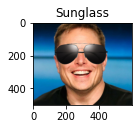

In [120]:
faceEyeArthematic[topLeft:bottomLeft,topRight:bottomRight] = eyeMaskedFinal

plt.subplot(133);plt.imshow(faceEyeArthematic[...,::-1]);plt.title("Sunglass")

(500, 600, 3)
(100, 190, 4)


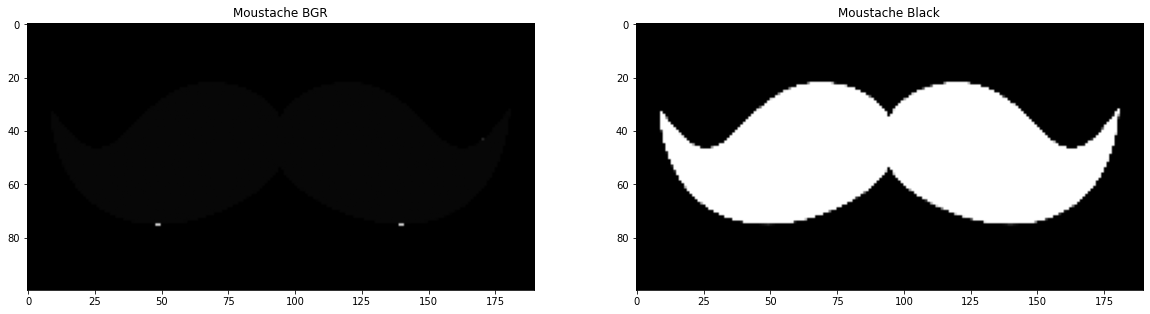

In [129]:
print(faceEyeArthematic.shape)

moustachePNG = cv2.imread(DATA_PATH+"images/moustache.png",cv2.IMREAD_UNCHANGED)
moustachePNG = np.float32(moustachePNG)/255

moustachePNG = cv2.resize(moustachePNG,(190,100),interpolation=cv2.INTER_LINEAR)
print(moustachePNG.shape)

moustacheBGR = moustachePNG[...,0:3]
moustacheMask = moustachePNG[...,3]

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(moustacheBGR[...,::-1]);plt.title("Moustache BGR");
plt.subplot(122);plt.imshow(moustacheMask,cmap='gray');plt.title("Moustache Black");

(100, 190, 3)


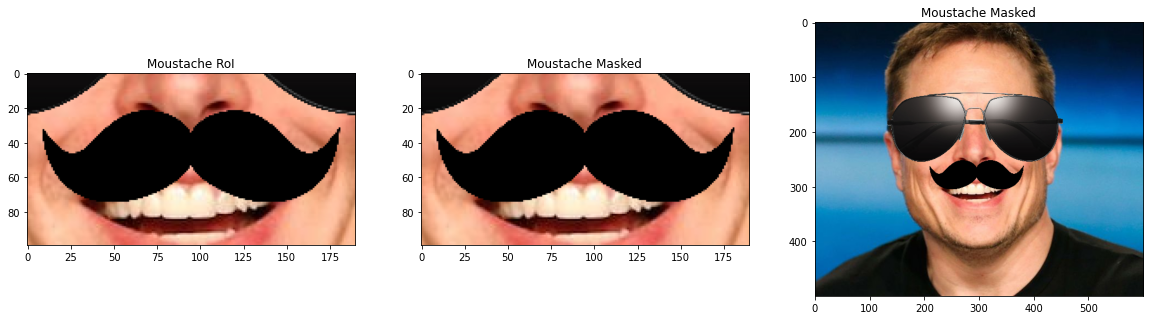

In [130]:
moustacheMask = cv2.merge((moustacheMask,moustacheMask,moustacheMask))

moustacheMusk = faceEyeArthematic.copy()

moustacheRoI = moustacheMusk[230:330,200:390]
print(moustacheRoI.shape)

maskedMoustache = cv2.multiply(moustacheBGR,moustacheMask)
maskedMusk = cv2.multiply(moustacheRoI,1 - moustacheMask)

eyeMaskedFinal = cv2.add(maskedMoustache,maskedMusk)
moustacheMusk[230:330,200:390] = maskedMusk


plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(moustacheRoI[...,::-1]);plt.title("Moustache RoI");
plt.subplot(132);plt.imshow(maskedMusk[...,::-1]);plt.title("Moustache Masked");
plt.subplot(133);plt.imshow(moustacheMusk[...,::-1]);plt.title("Moustache Masked");
